In [7]:
print("hello")

hello


In [26]:
import pandas as pd

# load your dataset
df = pd.read_csv("Occupancy_Estimation.csv")   # put your file name here

# see first few rows
print(df.head())

# see all column names (features)
print("\nColumns:")
print(df.columns)

# basic info (datatypes, null values)
print("\nInfo:")
print(df.info())

# quick statistics
print("\nDescribe:")
print(df.describe())


         Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0       

SHAPE: (10129, 19)

COLUMN NAMES:
 ['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count']

TARGET VALUE COUNTS:
Room_Occupancy_Count
0    8228
1     459
2     748
3     694
Name: count, dtype: int64

TARGET PERCENTAGE:
Room_Occupancy_Count
0    81.23
1     4.53
2     7.38
3     6.85
Name: count, dtype: float64


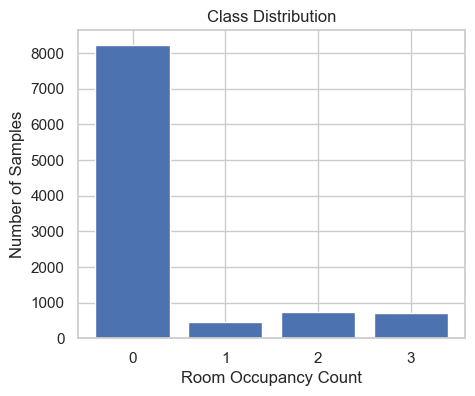


MISSING VALUES (per column):
Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

NUMBER OF DUPLICATE ROWS: 0

DTYPES:
Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound 

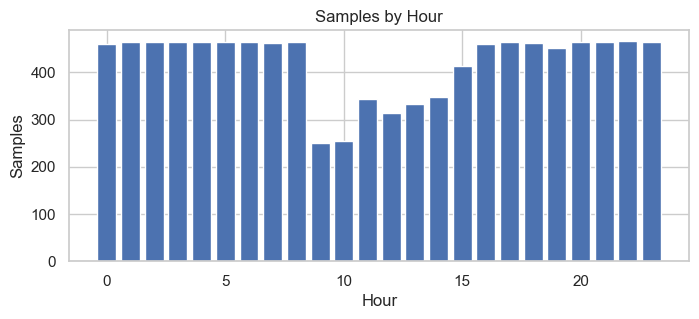

In [27]:
# Data quality & quick EDA checks for Room Occupancy dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------- load ----------
df = pd.read_csv("Occupancy_Estimation.csv")   # <- change this

# --------- basic info ----------
print("SHAPE:", df.shape)
print("\nCOLUMN NAMES:\n", df.columns.tolist())

# --------- target distribution ----------
print("\nTARGET VALUE COUNTS:")
vc = df["Room_Occupancy_Count"].value_counts().sort_index()
print(vc)
print("\nTARGET PERCENTAGE:")
print((vc / len(df) * 100).round(2))

# bar plot for target
plt.figure(figsize=(5,4))
plt.bar(vc.index, vc.values)
plt.xlabel("Room Occupancy Count"); plt.ylabel("Number of Samples")
plt.title("Class Distribution"); plt.xticks(vc.index)
plt.show()

# --------- missing values & duplicates ----------
print("\nMISSING VALUES (per column):")
print(df.isnull().sum())

print("\nNUMBER OF DUPLICATE ROWS:", df.duplicated().sum())

# --------- data types ----------
print("\nDTYPES:")
print(df.dtypes)

# --------- convert Date+Time to datetime and extract features ----------
# Try to parse Date and Time robustly
try:
    df["datetime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str))
except:
    # fallback: try Date then Time separately
    try:
        df["Date"] = pd.to_datetime(df["Date"])
        df["Time"] = pd.to_datetime(df["Time"]).dt.time
        df["datetime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str))
    except Exception as e:
        print("datetime parsing failed:", e)
        df["datetime"] = pd.NaT

# If parse succeeded, extract features
if df["datetime"].notna().any():
    df["hour"] = df["datetime"].dt.hour
    df["minute"] = df["datetime"].dt.minute
    df["day"] = df["datetime"].dt.day
    df["weekday"] = df["datetime"].dt.weekday
    df["is_weekend"] = df["weekday"].isin([5,6]).astype(int)
    print("\nEXTRACTED TIME FEATURES: hour, minute, day, weekday, is_weekend")

    # show distribution by hour (helpful to see if occupancy concentrated at certain hours)
    hour_counts = df.groupby("hour")["Room_Occupancy_Count"].count() if "hour" in df else None
    if hour_counts is not None and not hour_counts.empty:
        plt.figure(figsize=(8,3))
        plt.bar(hour_counts.index, hour_counts.values)
        plt.xlabel("Hour"); plt.ylabel("Samples"); plt.title("Samples by Hour")
        plt.show()



In [28]:
print(df.head())


         Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  ...  S5_CO2_Slope  S6_PIR  S7_PIR  \
0        34        53        40  ...      0.769231       0       0   
1        33        53        40  ...      0.646154       0       0   
2        34        53        40  ...      0.519231       0       0   
3        34        53        40  ...      0.388462       0       0   
4        34        54        40  ...      0.253846       0       0   

   Room_Occupancy_Count            datetime  hour  minute  day  weekday  \
0                     1 2017-12-22 10:49:41    10      49   22   

In [29]:
df = df.drop(["Date", "Time", "datetime"], axis=1)
print(df.head())

   S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  S2_Light  S3_Light  S4_Light  \
0    24.94    24.75    24.56    25.38       121        34        53        40   
1    24.94    24.75    24.56    25.44       121        33        53        40   
2    25.00    24.75    24.50    25.44       121        34        53        40   
3    25.00    24.75    24.56    25.44       121        34        53        40   
4    25.00    24.75    24.56    25.44       121        34        54        40   

   S1_Sound  S2_Sound  ...  S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  \
0      0.08      0.19  ...     390      0.769231       0       0   
1      0.93      0.05  ...     390      0.646154       0       0   
2      0.43      0.11  ...     390      0.519231       0       0   
3      0.41      0.10  ...     390      0.388462       0       0   
4      0.18      0.06  ...     390      0.253846       0       0   

   Room_Occupancy_Count  hour  minute  day  weekday  is_weekend  
0                     1    10      49 

In [30]:
df = df.drop(["minute", "day"], axis=1)
print(df.head())

   S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  S2_Light  S3_Light  S4_Light  \
0    24.94    24.75    24.56    25.38       121        34        53        40   
1    24.94    24.75    24.56    25.44       121        33        53        40   
2    25.00    24.75    24.50    25.44       121        34        53        40   
3    25.00    24.75    24.56    25.44       121        34        53        40   
4    25.00    24.75    24.56    25.44       121        34        54        40   

   S1_Sound  S2_Sound  S3_Sound  S4_Sound  S5_CO2  S5_CO2_Slope  S6_PIR  \
0      0.08      0.19      0.06      0.06     390      0.769231       0   
1      0.93      0.05      0.06      0.06     390      0.646154       0   
2      0.43      0.11      0.08      0.06     390      0.519231       0   
3      0.41      0.10      0.10      0.09     390      0.388462       0   
4      0.18      0.06      0.06      0.06     390      0.253846       0   

   S7_PIR  Room_Occupancy_Count  hour  weekday  is_weekend  
0

LOGISTiC REGRESSION AND SVM

In [32]:
X = df.drop("Room_Occupancy_Count", axis=1)
y = df["Room_Occupancy_Count"]

print("Split the dataset into with Target and only Features")


Split the dataset into with Target and only Features


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train and Test split done.")

Train and Test split done.


In [34]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("After applying SMOTE, the class distribution is:")
print(y_train_res.value_counts())

After applying SMOTE, the class distribution is:
Room_Occupancy_Count
0    6582
2    6582
3    6582
1    6582
Name: count, dtype: int64


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)
print("Features scaled using StandardScaler.")

Features scaled using StandardScaler.


LOGISTIC REGERESSION

In [40]:

# ----------------------- Logistic Regression -----------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create model
log_reg = LogisticRegression(max_iter=1000)

# Train model
log_reg.fit(X_train_scaled, y_train_res)

# Predict on test data
y_pred_lr = log_reg.predict(X_test_scaled)

# ----- Evaluation -----
print("\n===== Logistic Regression Results =====")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))



===== Logistic Regression Results =====

Confusion Matrix:
[[1646    0    0    0]
 [   0   92    0    0]
 [   0    0  148    1]
 [   1    0    8  130]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1646
           1       1.00      1.00      1.00        92
           2       0.95      0.99      0.97       149
           3       0.99      0.94      0.96       139

    accuracy                           1.00      2026
   macro avg       0.99      0.98      0.98      2026
weighted avg       1.00      1.00      1.00      2026

Test Accuracy: 0.9950641658440277


REALITY CHECKS

In [41]:
# Example: Empty room (low sound, low CO2, no PIR, low light)
sample_empty = [[
    25, 25, 24.8, 26,   # Temperature
    0, 0, 0, 0,         # Light
    0.08, 0.05, 0.06, 0.05,  # Sound
    350, 0.0,           # CO2 + slope
    0, 0,               # PIR sensors
    10, 4, 0            # hour, weekday (Fri), not weekend
]]

scaled_empty = scaler.transform(sample_empty)
print("Prediction for EMPTY room:", log_reg.predict(scaled_empty))


Prediction for EMPTY room: [0]


C:\Users\snant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Reality checks with Threshhold tuning


In [57]:
# ---------------- SAMPLE INPUTS ----------------

sample_empty = {
    "S1_Temp": 25.0, "S2_Temp": 25.1, "S3_Temp": 24.9, "S4_Temp": 25.3,
    "S1_Light": 0, "S2_Light": 0, "S3_Light": 5, "S4_Light": 0,
    "S1_Sound": 0.07, "S2_Sound": 0.05, "S3_Sound": 0.06, "S4_Sound": 0.06,
    "S5_CO2": 380, "S5_CO2_Slope": 0.0,
    "S6_PIR": 0, "S7_PIR": 0,
    "hour": 10, "weekday": 3, "is_weekend": 0
}

sample_one = {
    "S1_Temp": 25.3, "S2_Temp": 25.4, "S3_Temp": 25.0, "S4_Temp": 25.6,
    "S1_Light": 55, "S2_Light": 40, "S3_Light": 60, "S4_Light": 30,
    "S1_Sound": 0.35, "S2_Sound": 0.28, "S3_Sound": 0.25, "S4_Sound": 0.22,
    "S5_CO2": 580, "S5_CO2_Slope": 0.4,
    "S6_PIR": 1, "S7_PIR": 0,
    "hour": 11, "weekday": 2, "is_weekend": 0
}

sample_two = {
    "S1_Temp": 25.4, "S2_Temp": 25.5, "S3_Temp": 25.3, "S4_Temp": 25.7,
    "S1_Light": 90, "S2_Light": 70, "S3_Light": 120, "S4_Light": 40,
    "S1_Sound": 0.70, "S2_Sound": 0.60, "S3_Sound": 0.55, "S4_Sound": 0.50,
    "S5_CO2": 750, "S5_CO2_Slope": 1.2,
    "S6_PIR": 1, "S7_PIR": 1,
    "hour": 12, "weekday": 4, "is_weekend": 0
}

sample_three = {
    "S1_Temp": 25.5, "S2_Temp": 25.7, "S3_Temp": 25.4, "S4_Temp": 25.9,
    "S1_Light": 150, "S2_Light": 120, "S3_Light": 160, "S4_Light": 80,
    "S1_Sound": 1.10, "S2_Sound": 0.90, "S3_Sound": 0.85, "S4_Sound": 0.80,
    "S5_CO2": 1100, "S5_CO2_Slope": 2.0,
    "S6_PIR": 1, "S7_PIR": 1,
    "hour": 14, "weekday": 1, "is_weekend": 0
}


def test_lr_sample(sample_dict, threshold=0.03):
    df_sample = pd.DataFrame([sample_dict])
    scaled = scaler.transform(df_sample)

    # Default LR prediction
    default_pred = log_reg.predict(scaled)[0]

    # Probabilities
    probs = log_reg.predict_proba(scaled)[0]

    # Threshold logic (class-1)
    if probs[1] > threshold:
        final_pred = 1
    else:
        final_pred = probs.argmax()

    return default_pred, final_pred, probs


print("\n===== Logistic Regression REALITY CHECK =====")

for label, sample in {
    "EMPTY": sample_empty,
    "ONE PERSON": sample_one,
    "TWO PERSONS": sample_two,
    "THREE PERSONS": sample_three
}.items():

    d_pred, t_pred, probs = test_lr_sample(sample)

    print(f"\n--- {label} ---")
    print("Default Prediction     :", d_pred)
    print("Thresholded Prediction :", t_pred)
    print("Probabilities          :", probs)



===== Logistic Regression REALITY CHECK =====

--- EMPTY ---
Default Prediction     : 0
Thresholded Prediction : 0
Probabilities          : [9.99663674e-01 3.22813989e-04 2.13466790e-06 1.13773186e-05]

--- ONE PERSON ---
Default Prediction     : 0
Thresholded Prediction : 1
Probabilities          : [8.63730475e-01 4.73577031e-02 8.86568849e-02 2.54937210e-04]

--- TWO PERSONS ---
Default Prediction     : 2
Thresholded Prediction : 2
Probabilities          : [0.00145151 0.0084786  0.98480884 0.00526105]

--- THREE PERSONS ---
Default Prediction     : 2
Thresholded Prediction : 2
Probabilities          : [1.37637438e-10 4.16713506e-09 9.99999987e-01 9.03906487e-09]


In [42]:
sample_one = [[
    25.3, 25.4, 25.1, 26,
    40, 20, 30, 10,       # Light slightly increased
    0.2, 0.1, 0.2, 0.1,   # Sound slightly increased
    500, 1.2,             # CO2 rising
    1, 0,                 # PIR triggered
    11, 4, 0              # hour 11 AM
]]

scaled_one = scaler.transform(sample_one)
print("Prediction for 1 person:", log_reg.predict(scaled_one))


Prediction for 1 person: [0]


C:\Users\snant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [43]:
sample_many = [[
    25.8, 26.0, 25.7, 26.4,
    100, 80, 120, 60,       # Lights ON, bright
    0.8, 0.6, 0.7, 0.5,     # More sound
    900, 2.5,               # High CO2
    1, 1,                   # PIR active
    15, 2, 0                # Afternoon
]]

scaled_many = scaler.transform(sample_many)
print("Prediction for 2-3 persons:", log_reg.predict(scaled_many))


Prediction for 2-3 persons: [2]


C:\Users\snant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


LINEAR SVM

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svm_linear = SVC(kernel="linear")
svm_linear.fit(X_train_scaled, y_train_res)

y_pred_svm_linear = svm_linear.predict(X_test_scaled)

print("\n===== Linear SVM Results =====")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm_linear))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm_linear))

print("Test Accuracy:", accuracy_score(y_test, y_pred_svm_linear))



===== Linear SVM Results =====

Confusion Matrix:
[[1646    0    0    0]
 [   0   92    0    0]
 [   0    0  148    1]
 [   1    0    6  132]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1646
           1       1.00      1.00      1.00        92
           2       0.96      0.99      0.98       149
           3       0.99      0.95      0.97       139

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026

Test Accuracy: 0.9960513326752222


In [ ]:
# Example: Empty room (low sound, low CO2, no PIR, low light)
sample_empty = [[
    25, 25, 24.8, 26,   # Temperature
    0, 0, 0, 0,         # Light
    0.08, 0.05, 0.06, 0.05,  # Sound
    350, 0.0,           # CO2 + slope
    0, 0,               # PIR sensors
    10, 4, 0            # hour, weekday (Fri), not weekend
]]

scaled_empty = scaler.transform(sample_empty)
print("Prediction for EMPTY room:", svm_linear.predict(scaled_empty))

sample_one = [[
    25.3, 25.4, 25.1, 26,
    40, 20, 30, 10,       # Light slightly increased
    0.2, 0.1, 0.2, 0.1,   # Sound slightly increased
    500, 1.2,             # CO2 rising
    1, 0,                 # PIR triggered
    11, 4, 0              # hour 11 AM
]]

scaled_one = scaler.transform(sample_one)
print("Prediction for 1 person:", svm_linear.predict(scaled_one))


sample_many = [[
    25.8, 26.0, 25.7, 26.4,
    100, 80, 120, 60,       # Lights ON, bright
    0.8, 0.6, 0.7, 0.5,     # More sound
    900, 2.5,               # High CO2
    1, 1,                   # PIR active
    15, 2, 0                # Afternoon
]]

scaled_many = scaler.transform(sample_many)
print("Prediction for 2-3 persons:", svm_linear.predict(scaled_many))



Prediction for EMPTY room: [0]
Prediction for 1 person: [0]
Prediction for 1 person: [1]


C:\Users\snant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\snant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\snant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svm_rbf = SVC(kernel="rbf")
svm_rbf.fit(X_train_scaled, y_train_res)

y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("\n===== RBF SVM Results =====")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf))

print("Test Accuracy:", accuracy_score(y_test, y_pred_rbf))



===== RBF SVM Results =====

Confusion Matrix:
[[1644    0    0    2]
 [   0   92    0    0]
 [   0    0  149    0]
 [   1    0    6  132]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1646
           1       1.00      1.00      1.00        92
           2       0.96      1.00      0.98       149
           3       0.99      0.95      0.97       139

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026

Test Accuracy: 0.9955577492596249


In [48]:
# ------------------ REALITY CHECK FOR RBF SVM ------------------

import pandas as pd

# 1️⃣ Sample: EMPTY ROOM
sample_empty = [[
    25, 25, 24.8, 26,       # temperature
    0, 0, 0, 0,             # light
    0.08, 0.05, 0.06, 0.05, # sound
    350, 0.0,               # CO2, slope
    0, 0,                   # PIR sensors
    10, 4, 0                # hour, weekday, is_weekend
]]

# 2️⃣ Sample: 1 PERSON
sample_one = [[
    25.3, 25.4, 25.1, 26,
    40, 20, 30, 10,         # light slightly increased
    0.2, 0.1, 0.2, 0.1,     # sound increased
    500, 1.2,               # CO2 rising
    1, 0,                   # PIR triggered
    11, 4, 0                # hour, weekday
]]

# 3️⃣ Sample: 2–3 PERSONS
sample_many = [[
    25.8, 26.0, 25.7, 26.4,
    100, 80, 120, 60,       # lights ON
    0.8, 0.6, 0.7, 0.5,     # high sound
    900, 2.5,               # high CO2
    1, 1,                   # PIR sensors active
    15, 2, 0                # afternoon time
]]

# Convert to DataFrame to avoid warnings
sample_empty_df = pd.DataFrame(sample_empty, columns=X.columns)
sample_one_df   = pd.DataFrame(sample_one,   columns=X.columns)
sample_many_df  = pd.DataFrame(sample_many,  columns=X.columns)

# Scale the samples
scaled_empty = scaler.transform(sample_empty_df)
scaled_one   = scaler.transform(sample_one_df)
scaled_many  = scaler.transform(sample_many_df)

# Predictions
print("Prediction EMPTY:", svm_rbf.predict(scaled_empty))
print("Prediction 1 person:", svm_rbf.predict(scaled_one))
print("Prediction 2-3 persons:", svm_rbf.predict(scaled_many))


Prediction EMPTY: [0]
Prediction 1 person: [0]
Prediction 2-3 persons: [3]


dataset does NOT contain strong signals for class 1.

so Going for Advanced Models


===== Random Forest Results =====
Train Accuracy: 1.0000
Test  Accuracy: 0.9961

Confusion Matrix (test):
[[1646    0    0    0]
 [   0   92    0    0]
 [   0    2  147    0]
 [   1    0    5  133]]

Classification Report (test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1646
           1       0.98      1.00      0.99        92
           2       0.97      0.99      0.98       149
           3       1.00      0.96      0.98       139

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026

CV Scores (5-fold) on training set: [0.99924041 0.99962021 0.9998101  1.         1.        ]
Mean CV: 0.9997341435624761

Top feature importances:
S1_Light        0.156125
S3_Light        0.146442
S2_Light        0.143410
S5_CO2          0.088060
S1_Sound        0.068100
S4_Light        0.062250
S5_CO2_Slope    0.046711
S2_Temp     

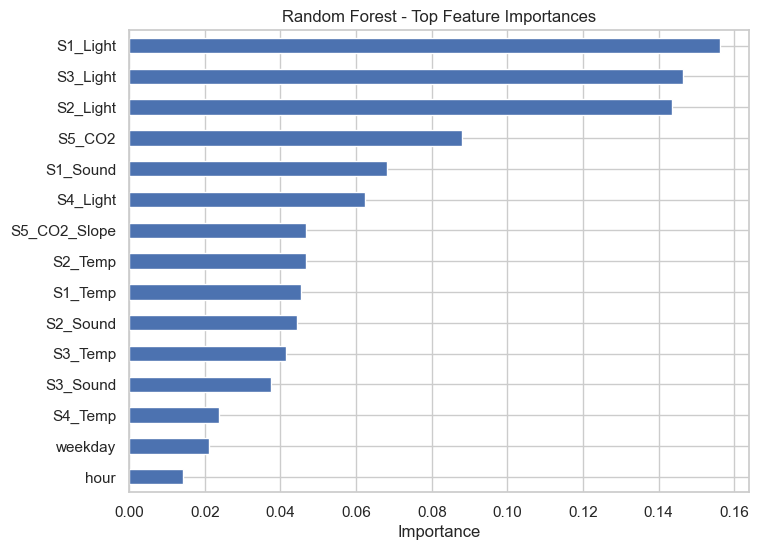


Reality check predictions (Random Forest):
Prediction EMPTY      : 0
Prediction 1 person   : 0
Prediction 2-3 persons: 3

Prediction probabilities (EMPTY): [1. 0. 0. 0.]
Prediction probabilities (1 person): [0.47  0.41  0.065 0.055]
Prediction probabilities (2-3 persons): [0.215 0.175 0.265 0.345]


In [49]:
# -------------------- Random Forest: train, eval, feature importance, reality check --------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1) Create & train model
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_res, y_train_res)   # X_train_res is SMOTE resampled train (unscaled or original)

# 2) Predictions
y_pred_train = rf.predict(X_train_res)
y_pred_test  = rf.predict(X_test)  # X_test is the original test set (not SMOTE'd)

# 3) Basic metrics
print("\n===== Random Forest Results =====")
print(f"Train Accuracy: {accuracy_score(y_train_res, y_pred_train):.4f}")
print(f"Test  Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")

# 4) Confusion matrix & classification report on test
print("\nConfusion Matrix (test):")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report (test):")
print(classification_report(y_test, y_pred_test))

# 5) Cross-Validation on training set (shows stability)
cv_scores = cross_val_score(rf, X_train_res, y_train_res, cv=5, n_jobs=-1)
print("CV Scores (5-fold) on training set:", cv_scores)
print("Mean CV:", np.mean(cv_scores))

# 6) Feature importance (top 15)
fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
topN = 15 if len(fi) > 15 else len(fi)
print("\nTop feature importances:")
print(fi.head(topN))

# Plot feature importances
plt.figure(figsize=(8,6))
fi.head(topN).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Random Forest - Top Feature Importances")
plt.xlabel("Importance")
plt.show()


print("\nReality check predictions (Random Forest):")
print("Prediction EMPTY      :", rf.predict(sample_empty_df)[0])
print("Prediction 1 person   :", rf.predict(sample_one_df)[0])
print("Prediction 2-3 persons:", rf.predict(sample_many_df)[0])

# 8) (Optional) Show probabilities for the samples to see model confidence
print("\nPrediction probabilities (EMPTY):", rf.predict_proba(sample_empty_df)[0])
print("Prediction probabilities (1 person):", rf.predict_proba(sample_one_df)[0])
print("Prediction probabilities (2-3 persons):", rf.predict_proba(sample_many_df)[0])


XGBoost

In [51]:
%pip install xgboost



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\snant\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 524.3 kB/s eta 0:02:17
   ---------------------------------------- 0.8/72.0 MB 762.0 kB/s eta 0:01:34
   ---------------------------------------- 0.8/72.0 MB 762.0 kB/s eta 0:01:34
   ---------------------------------------- 0.8/72.0 MB 762.0 kB/s eta 0:01:34
   ---------------------------------------- 0.8/72.0 MB 762.0 kB/s eta 0:01:34
   ---------------------------------------- 

C:\Users\snant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:199: UserWarning: [00:09:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== XGBoost Results =====
Train Accuracy: 1.0000
Test  Accuracy: 0.9975

Confusion Matrix (test):
[[1646    0    0    0]
 [   0   92    0    0]
 [   0    0  149    0]
 [   0    0    5  134]]

Classification Report (test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1646
           1       1.00      1.00      1.00        92
           2       0.97      1.00      0.98       149
           3       1.00      0.96      0.98       139

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026

CV Scores (5-fold) on training set: [0.99886062 0.99962021 0.9998101  1.         1.        ]
Mean CV: 0.9996581845803266

Top feature importances:
S1_Sound        0.156019
S3_Light        0.141208
S1_Light        0.139272
S4_Light        0.138553
S2_Temp         0.094123
weekday         0.076320
S2_Light        0.072791
S4_Temp         0.

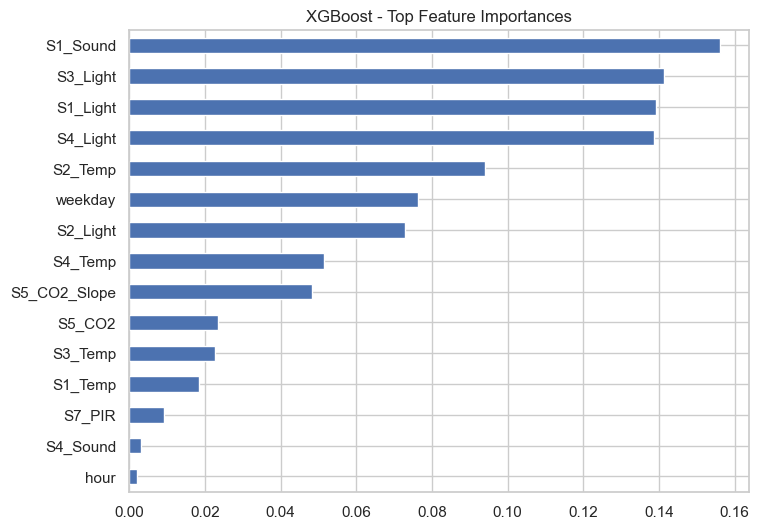


Reality check predictions (XGBoost):
Prediction EMPTY      : 0
Prediction 1 person   : 0
Prediction 2-3 persons: 3

Prediction probabilities (EMPTY): [9.9997699e-01 1.8041457e-05 2.2508557e-06 2.7088897e-06]
Prediction probabilities (1 person): [9.9779510e-01 1.6468997e-03 2.4025873e-04 3.1777244e-04]
Prediction probabilities (2-3 persons): [2.7822896e-05 4.3429167e-04 1.4092894e-04 9.9939692e-01]


In [ ]:
# -------------------- XGBoost: train, eval, feature importance, reality check --------------------
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Create & train model
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train_res, y_train_res)

# 2) Predictions
y_pred_train = xgb.predict(X_train_res)
y_pred_test  = xgb.predict(X_test)

# 3) Basic metrics
print("\n===== XGBoost Results =====")
print(f"Train Accuracy: {accuracy_score(y_train_res, y_pred_train):.4f}")
print(f"Test  Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")

# 4) Confusion matrix & classification report on test
print("\nConfusion Matrix (test):")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report (test):")
print(classification_report(y_test, y_pred_test))

# 5) Cross-Validation on training set
cv_scores = cross_val_score(xgb, X_train_res, y_train_res, cv=5, n_jobs=-1)
print("CV Scores (5-fold) on training set:", cv_scores)
print("Mean CV:", np.mean(cv_scores))

# 6) Feature importance (top 15)
fi = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
topN = 15 if len(fi) > 15 else len(fi)
print("\nTop feature importances:")
print(fi.head(topN))

plt.figure(figsize=(8,6))
fi.head(topN).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("XGBoost - Top Feature Importances")
plt.show()

# 7) Reality check predictions & probabilities
print("\nReality check predictions (XGBoost):")
print("Prediction EMPTY      :", xgb.predict(sample_empty_df)[0])
print("Prediction 1 person   :", xgb.predict(sample_one_df)[0])
print("Prediction 2-3 persons:", xgb.predict(sample_many_df)[0])

print("\nPrediction probabilities (EMPTY):", xgb.predict_proba(sample_empty_df)[0])
print("Prediction probabilities (1 person):", xgb.predict_proba(sample_one_df)[0])
print("Prediction probabilities (2-3 persons):", xgb.predict_proba(sample_many_df)[0])


Best threshold for class-1 (by F1_class1): 0.03
threshold           0.03
f1_class1           1.00
precision_class1    1.00
recall_class1       1.00
macro_f1            1.00
Name: 3, dtype: float64

Top thresholds (by F1_class1):
    threshold  f1_class1  precision_class1  recall_class1  macro_f1
5        0.05        1.0               1.0            1.0       1.0
4        0.04        1.0               1.0            1.0       1.0
3        0.03        1.0               1.0            1.0       1.0
11       0.11        1.0               1.0            1.0       1.0
12       0.12        1.0               1.0            1.0       1.0
13       0.13        1.0               1.0            1.0       1.0
6        0.06        1.0               1.0            1.0       1.0
7        0.07        1.0               1.0            1.0       1.0
8        0.08        1.0               1.0            1.0       1.0
9        0.09        1.0               1.0            1.0       1.0


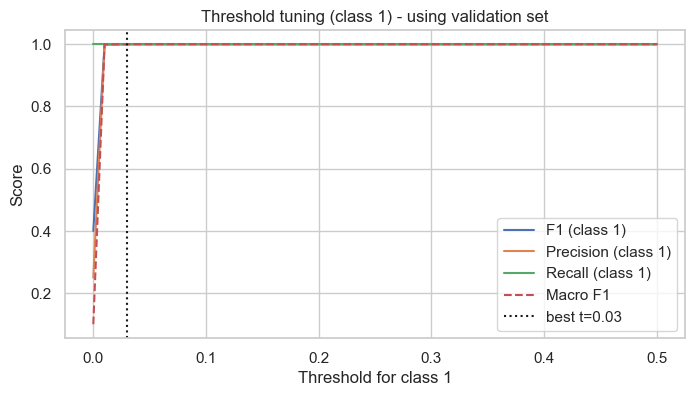


Validation - Default model report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1317
           1       1.00      1.00      1.00      1316
           2       1.00      1.00      1.00      1317
           3       1.00      1.00      1.00      1316

    accuracy                           1.00      5266
   macro avg       1.00      1.00      1.00      5266
weighted avg       1.00      1.00      1.00      5266

Confusion matrix:
 [[1317    0    0    0]
 [   0 1316    0    0]
 [   0    0 1317    0]
 [   0    0    0 1316]]

Validation - Thresholded model report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1317
           1       1.00      1.00      1.00      1316
           2       1.00      1.00      1.00      1317
           3       1.00      1.00      1.00      1316

    accuracy                           1.00      5266
   macro avg       1.00      1.00      1.00      52

In [53]:
# ---------------- Threshold tuning using existing xgb model (no re-training) ----------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

TARGET_CLASS = 1
THRESHOLDS = np.arange(0.0, 0.51, 0.01)

# 1) create a small validation split from X_train_res (do NOT use X_test)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_res, y_train_res, test_size=0.2, random_state=42, stratify=y_train_res
)

# 2) Use the existing trained model `xgb` to get probabilities on X_val
probs_val = xgb.predict_proba(X_val)
pred_default = np.argmax(probs_val, axis=1)

results = []
for t in THRESHOLDS:
    preds = pred_default.copy()
    preds[(probs_val[:, TARGET_CLASS] > t)] = TARGET_CLASS

    f1_c1 = f1_score(y_val, preds, labels=[TARGET_CLASS], average="macro", zero_division=0)
    prec_c1 = precision_score(y_val, preds, labels=[TARGET_CLASS], average="macro", zero_division=0)
    rec_c1 = recall_score(y_val, preds, labels=[TARGET_CLASS], average="macro", zero_division=0)
    macro_f1 = f1_score(y_val, preds, average="macro", zero_division=0)

    results.append({
        "threshold": t,
        "f1_class1": f1_c1,
        "precision_class1": prec_c1,
        "recall_class1": rec_c1,
        "macro_f1": macro_f1
    })

res_df = pd.DataFrame(results)
best_row = res_df.loc[res_df["f1_class1"].idxmax()]
best_threshold = best_row["threshold"]
print("Best threshold for class-1 (by F1_class1):", best_threshold)
print(best_row)
print("\nTop thresholds (by F1_class1):")
print(res_df.sort_values("f1_class1", ascending=False).head(10))

# 3) Plot metrics vs threshold
plt.figure(figsize=(8,4))
plt.plot(res_df["threshold"], res_df["f1_class1"], label="F1 (class 1)")
plt.plot(res_df["threshold"], res_df["precision_class1"], label="Precision (class 1)")
plt.plot(res_df["threshold"], res_df["recall_class1"], label="Recall (class 1)")
plt.plot(res_df["threshold"], res_df["macro_f1"], label="Macro F1", linestyle="--")
plt.axvline(best_threshold, color="k", linestyle=":", label=f"best t={best_threshold:.2f}")
plt.xlabel("Threshold for class 1")
plt.ylabel("Score")
plt.title("Threshold tuning (class 1) - using validation set")
plt.legend()
plt.grid(True)
plt.show()

# 4) Evaluate val & test behavior using best threshold
def apply_threshold_override(probs, class_idx, thresh):
    preds = np.argmax(probs, axis=1).copy()
    preds[(probs[:, class_idx] > thresh)] = class_idx
    return preds

probs_val_full = xgb.predict_proba(X_val)
pred_val_default = np.argmax(probs_val_full, axis=1)
pred_val_thresh = apply_threshold_override(probs_val_full, TARGET_CLASS, best_threshold)

print("\nValidation - Default model report:")
print(classification_report(y_val, pred_val_default))
print("Confusion matrix:\n", confusion_matrix(y_val, pred_val_default))

print("\nValidation - Thresholded model report:")
print(classification_report(y_val, pred_val_thresh))
print("Confusion matrix:\n", confusion_matrix(y_val, pred_val_thresh))

# Test set evaluation
probs_test = xgb.predict_proba(X_test)
pred_test_default = np.argmax(probs_test, axis=1)
pred_test_thresh = apply_threshold_override(probs_test, TARGET_CLASS, best_threshold)

print("\nTest - Default model report:")
print(classification_report(y_test, pred_test_default))
print("Confusion matrix:\n", confusion_matrix(y_test, pred_test_default))

print("\nTest - Thresholded model report:")
print(classification_report(y_test, pred_test_thresh))
print("Confusion matrix:\n", confusion_matrix(y_test, pred_test_thresh))

# 5) Single-sample reality check using chosen threshold
def predict_with_threshold(model, sample_df, class_idx, thresh):
    probs = model.predict_proba(sample_df)[0]
    if probs[class_idx] > thresh:
        return class_idx, probs
    return int(np.argmax(probs)), probs

print("\nSingle-sample reality check using chosen threshold:")
for name, df_sample in [("EMPTY", sample_empty_df), ("ONE", sample_one_df), ("MANY", sample_many_df)]:
    pred, probs = predict_with_threshold(xgb, df_sample, TARGET_CLASS, best_threshold)
    print(name, "-> pred:", pred, "probs:", probs)

# Save results
res_df.to_csv("threshold_tuning_results_xgb.csv", index=False)


In [55]:
# -------- REALITY CHECK FOR 1 PERSON --------

# 1) Create realistic 1-person sensor input
sample_one_df = pd.DataFrame([{
    'S1_Temp': 25.30, 'S2_Temp': 25.45, 'S3_Temp': 25.00, 'S4_Temp': 25.70,
    'S1_Light': 40, 'S2_Light': 35, 'S3_Light': 60, 'S4_Light': 20,
    'S1_Sound': 0.35, 'S2_Sound': 0.30, 'S3_Sound': 0.28, 'S4_Sound': 0.25,
    'S5_CO2': 520, 'S5_CO2_Slope': 0.50,
    'S6_PIR': 1, 'S7_PIR': 0,
    'hour': 11, 'weekday': 3, 'is_weekend': 0
}])

# 2) Get probabilities from XGBoost model
probs = xgb.predict_proba(sample_one_df)[0]
print("Prediction Probabilities:", probs)

# 3) Apply threshold rule (your best threshold = 0.03)
threshold = 0.03  # best threshold from tuning
pred = 1 if probs[1] > threshold else np.argmax(probs)

print("Final Prediction (with threshold):", pred)

# 4) Also print the default prediction for comparison
pred_default = xgb.predict(sample_one_df)[0]
print("Default Prediction (without threshold):", pred_default)



Prediction Probabilities: [0.5781684  0.20878379 0.11333941 0.09970844]
Final Prediction (with threshold): 1
Default Prediction (without threshold): 0


#Final check

In [56]:
# ---------------- Combined Reality Check for 0, 1, 2, 3 persons ----------------

import numpy as np
import pandas as pd

# ----------- 1. Define realistic samples for each class  -----------

# EMPTY ROOM
sample_empty_df = pd.DataFrame([{
    'S1_Temp': 25.0, 'S2_Temp': 25.1, 'S3_Temp': 24.9, 'S4_Temp': 25.2,
    'S1_Light': 5, 'S2_Light': 4, 'S3_Light': 8, 'S4_Light': 3,
    'S1_Sound': 0.08, 'S2_Sound': 0.06, 'S3_Sound': 0.07, 'S4_Sound': 0.06,
    'S5_CO2': 380, 'S5_CO2_Slope': 0.02,
    'S6_PIR': 0, 'S7_PIR': 0,
    'hour': 10, 'weekday': 3, 'is_weekend': 0
}])

# 1 PERSON (realistic)
sample_one_df = pd.DataFrame([{
    'S1_Temp': 25.30, 'S2_Temp': 25.45, 'S3_Temp': 25.00, 'S4_Temp': 25.70,
    'S1_Light': 40, 'S2_Light': 35, 'S3_Light': 60, 'S4_Light': 20,
    'S1_Sound': 0.35, 'S2_Sound': 0.30, 'S3_Sound': 0.28, 'S4_Sound': 0.25,
    'S5_CO2': 520, 'S5_CO2_Slope': 0.50,
    'S6_PIR': 1, 'S7_PIR': 0,
    'hour': 11, 'weekday': 3, 'is_weekend': 0
}])

# 2 PERSONS (moderate activity)
sample_two_df = pd.DataFrame([{
    'S1_Temp': 25.6, 'S2_Temp': 25.8, 'S3_Temp': 25.3, 'S4_Temp': 25.9,
    'S1_Light': 90, 'S2_Light': 80, 'S3_Light': 120, 'S4_Light': 45,
    'S1_Sound': 0.60, 'S2_Sound': 0.55, 'S3_Sound': 0.48, 'S4_Sound': 0.40,
    'S5_CO2': 750, 'S5_CO2_Slope': 1.2,
    'S6_PIR': 1, 'S7_PIR': 1,
    'hour': 14, 'weekday': 2, 'is_weekend': 0
}])

# 3 PERSONS (high activity)
sample_three_df = pd.DataFrame([{
    'S1_Temp': 25.9, 'S2_Temp': 26.2, 'S3_Temp': 25.7, 'S4_Temp': 26.1,
    'S1_Light': 130, 'S2_Light': 140, 'S3_Light': 150, 'S4_Light': 70,
    'S1_Sound': 1.1, 'S2_Sound': 0.95, 'S3_Sound': 0.88, 'S4_Sound': 0.75,
    'S5_CO2': 1050, 'S5_CO2_Slope': 2.5,
    'S6_PIR': 1, 'S7_PIR': 1,
    'hour': 16, 'weekday': 4, 'is_weekend': 0
}])

# ----------- 2. Threshold prediction function  -----------

def predict_with_threshold(model, df, threshold=0.03, target_class=1):
    probs = model.predict_proba(df)[0]
    default_pred = np.argmax(probs)
    threshold_pred = target_class if probs[target_class] > threshold else default_pred
    return default_pred, threshold_pred, probs

# ----------- 3. Run reality check for all samples -----------

samples = {
    "EMPTY": sample_empty_df,
    "ONE PERSON": sample_one_df,
    "TWO PERSONS": sample_two_df,
    "THREE PERSONS": sample_three_df,
}

print("===== COMBINED REALITY CHECK RESULTS =====\n")

for name, df in samples.items():
    default_pred, threshold_pred, probs = predict_with_threshold(xgb, df)
    
    print(f"--- {name} ---")
    print("Default Prediction       :", default_pred)
    print("Thresholded Prediction   :", threshold_pred)
    print("Probabilities            :", probs)
    print()



===== COMBINED REALITY CHECK RESULTS =====

--- EMPTY ---
Default Prediction       : 0
Thresholded Prediction   : 0
Probabilities            : [9.9998605e-01 8.4676058e-06 2.4401033e-06 3.0099231e-06]

--- ONE PERSON ---
Default Prediction       : 0
Thresholded Prediction   : 1
Probabilities            : [0.5781684  0.20878379 0.11333941 0.09970844]

--- TWO PERSONS ---
Default Prediction       : 3
Thresholded Prediction   : 3
Probabilities            : [5.419838e-03 7.556121e-04 7.960031e-03 9.858645e-01]

--- THREE PERSONS ---
Default Prediction       : 3
Thresholded Prediction   : 3
Probabilities            : [1.4138330e-05 6.9778573e-05 1.2587616e-03 9.9865735e-01]



checking with all models with threshold tuning

In [58]:
# ---------------- Linear SVM reality check (retrain with probability=True) ----------------
from sklearn.svm import SVC
import numpy as np
import pandas as pd

# 1) Retrain linear SVM with probability=True (uses same scaled training data)
svm_linear_prob = SVC(kernel="linear", probability=True, random_state=42)
svm_linear_prob.fit(X_train_scaled, y_train_res)   # X_train_scaled is from earlier scaler.fit_transform on SMOTE data

# 2) Define realistic samples (same as previous)
sample_empty = {
    "S1_Temp": 25.0, "S2_Temp": 25.1, "S3_Temp": 24.9, "S4_Temp": 25.3,
    "S1_Light": 0, "S2_Light": 0, "S3_Light": 5, "S4_Light": 0,
    "S1_Sound": 0.07, "S2_Sound": 0.05, "S3_Sound": 0.06, "S4_Sound": 0.06,
    "S5_CO2": 380, "S5_CO2_Slope": 0.0,
    "S6_PIR": 0, "S7_PIR": 0,
    "hour": 10, "weekday": 3, "is_weekend": 0
}

sample_one = {
    "S1_Temp": 25.3, "S2_Temp": 25.4, "S3_Temp": 25.0, "S4_Temp": 25.6,
    "S1_Light": 55, "S2_Light": 40, "S3_Light": 60, "S4_Light": 30,
    "S1_Sound": 0.35, "S2_Sound": 0.28, "S3_Sound": 0.25, "S4_Sound": 0.22,
    "S5_CO2": 580, "S5_CO2_Slope": 0.4,
    "S6_PIR": 1, "S7_PIR": 0,
    "hour": 11, "weekday": 2, "is_weekend": 0
}

sample_two = {
    "S1_Temp": 25.4, "S2_Temp": 25.5, "S3_Temp": 25.3, "S4_Temp": 25.7,
    "S1_Light": 90, "S2_Light": 70, "S3_Light": 120, "S4_Light": 40,
    "S1_Sound": 0.70, "S2_Sound": 0.60, "S3_Sound": 0.55, "S4_Sound": 0.50,
    "S5_CO2": 750, "S5_CO2_Slope": 1.2,
    "S6_PIR": 1, "S7_PIR": 1,
    "hour": 12, "weekday": 4, "is_weekend": 0
}

sample_three = {
    "S1_Temp": 25.5, "S2_Temp": 25.7, "S3_Temp": 25.4, "S4_Temp": 25.9,
    "S1_Light": 150, "S2_Light": 120, "S3_Light": 160, "S4_Light": 80,
    "S1_Sound": 1.10, "S2_Sound": 0.90, "S3_Sound": 0.85, "S4_Sound": 0.80,
    "S5_CO2": 1100, "S5_CO2_Slope": 2.0,
    "S6_PIR": 1, "S7_PIR": 1,
    "hour": 14, "weekday": 1, "is_weekend": 0
}

# 3) Helper to run a single sample through scaler + svm and apply threshold
def lr_svm_test_sample(svm_model, sample_dict, scaler, threshold=0.03, target_class=1):
    df = pd.DataFrame([sample_dict])
    scaled = scaler.transform(df)        # scaler must be fitted earlier on training data
    probs = svm_model.predict_proba(scaled)[0]   # requires probability=True
    default_pred = int(np.argmax(probs))
    thresh_pred = int(target_class) if probs[target_class] > threshold else default_pred
    return default_pred, thresh_pred, probs

# 4) Run combined reality check for linear SVM
samples = {
    "EMPTY": sample_empty,
    "ONE PERSON": sample_one,
    "TWO PERSONS": sample_two,
    "THREE PERSONS": sample_three
}

print("===== Linear SVM (probabilities enabled) REALITY CHECK =====\n")
for name, sample in samples.items():
    default_pred, thresh_pred, probs = lr_svm_test_sample(svm_linear_prob, sample, scaler, threshold=0.03)
    print(f"--- {name} ---")
    print("Default Prediction     :", default_pred)
    print("Thresholded Prediction :", thresh_pred)
    print("Probabilities          :", probs)
    print()


===== Linear SVM (probabilities enabled) REALITY CHECK =====

--- EMPTY ---
Default Prediction     : 0
Thresholded Prediction : 0
Probabilities          : [9.95610338e-01 4.50639382e-05 5.23735226e-05 4.29222460e-03]

--- ONE PERSON ---
Default Prediction     : 0
Thresholded Prediction : 1
Probabilities          : [0.80810508 0.11707994 0.05194981 0.02286517]

--- TWO PERSONS ---
Default Prediction     : 1
Thresholded Prediction : 1
Probabilities          : [0.03074254 0.77570804 0.04776453 0.1457849 ]

--- THREE PERSONS ---
Default Prediction     : 1
Thresholded Prediction : 1
Probabilities          : [0.09831088 0.30838137 0.29413659 0.29917116]



In [59]:
# ---------------- RBF SVM reality check (retrain with probability=True) ----------------
from sklearn.svm import SVC
import numpy as np
import pandas as pd

# 1) Retrain RBF SVM with probability=True
svm_rbf_prob = SVC(kernel="rbf", probability=True, random_state=42)
svm_rbf_prob.fit(X_train_scaled, y_train_res)   # X_train_scaled must be your scaled SMOTE train

# 2) Define realistic samples (same as used earlier)
sample_empty = {
    "S1_Temp": 25.0, "S2_Temp": 25.1, "S3_Temp": 24.9, "S4_Temp": 25.3,
    "S1_Light": 0, "S2_Light": 0, "S3_Light": 5, "S4_Light": 0,
    "S1_Sound": 0.07, "S2_Sound": 0.05, "S3_Sound": 0.06, "S4_Sound": 0.06,
    "S5_CO2": 380, "S5_CO2_Slope": 0.0,
    "S6_PIR": 0, "S7_PIR": 0,
    "hour": 10, "weekday": 3, "is_weekend": 0
}

sample_one = {
    "S1_Temp": 25.3, "S2_Temp": 25.4, "S3_Temp": 25.0, "S4_Temp": 25.6,
    "S1_Light": 55, "S2_Light": 40, "S3_Light": 60, "S4_Light": 30,
    "S1_Sound": 0.35, "S2_Sound": 0.28, "S3_Sound": 0.25, "S4_Sound": 0.22,
    "S5_CO2": 580, "S5_CO2_Slope": 0.4,
    "S6_PIR": 1, "S7_PIR": 0,
    "hour": 11, "weekday": 2, "is_weekend": 0
}

sample_two = {
    "S1_Temp": 25.4, "S2_Temp": 25.5, "S3_Temp": 25.3, "S4_Temp": 25.7,
    "S1_Light": 90, "S2_Light": 70, "S3_Light": 120, "S4_Light": 40,
    "S1_Sound": 0.70, "S2_Sound": 0.60, "S3_Sound": 0.55, "S4_Sound": 0.50,
    "S5_CO2": 750, "S5_CO2_Slope": 1.2,
    "S6_PIR": 1, "S7_PIR": 1,
    "hour": 12, "weekday": 4, "is_weekend": 0
}

sample_three = {
    "S1_Temp": 25.5, "S2_Temp": 25.7, "S3_Temp": 25.4, "S4_Temp": 25.9,
    "S1_Light": 150, "S2_Light": 120, "S3_Light": 160, "S4_Light": 80,
    "S1_Sound": 1.10, "S2_Sound": 0.90, "S3_Sound": 0.85, "S4_Sound": 0.80,
    "S5_CO2": 1100, "S5_CO2_Slope": 2.0,
    "S6_PIR": 1, "S7_PIR": 1,
    "hour": 14, "weekday": 1, "is_weekend": 0
}

# 3) Helper to scale and predict
def rbf_svm_test_sample(svm_model, sample_dict, scaler, threshold=0.03, target_class=1):
    df = pd.DataFrame([sample_dict])
    scaled = scaler.transform(df)
    probs = svm_model.predict_proba(scaled)[0]
    default_pred = int(np.argmax(probs))
    thresh_pred = int(target_class) if probs[target_class] > threshold else default_pred
    return default_pred, thresh_pred, probs

# 4) Run combined reality check for RBF SVM
samples = {
    "EMPTY": sample_empty,
    "ONE PERSON": sample_one,
    "TWO PERSONS": sample_two,
    "THREE PERSONS": sample_three
}

print("===== RBF SVM (probabilities enabled) REALITY CHECK =====\n")
for name, sample in samples.items():
    default_pred, thresh_pred, probs = rbf_svm_test_sample(svm_rbf_prob, sample, scaler, threshold=0.03)
    print(f"--- {name} ---")
    print("Default Prediction     :", default_pred)
    print("Thresholded Prediction :", thresh_pred)
    print("Probabilities          :", probs)
    print()


===== RBF SVM (probabilities enabled) REALITY CHECK =====

--- EMPTY ---
Default Prediction     : 0
Thresholded Prediction : 0
Probabilities          : [9.99926510e-01 2.62790374e-05 4.05904043e-06 4.31521080e-05]

--- ONE PERSON ---
Default Prediction     : 3
Thresholded Prediction : 1
Probabilities          : [0.36300272 0.08237924 0.01367473 0.54094331]

--- TWO PERSONS ---
Default Prediction     : 1
Thresholded Prediction : 1
Probabilities          : [0.0171756  0.66188512 0.07891928 0.24202   ]

--- THREE PERSONS ---
Default Prediction     : 3
Thresholded Prediction : 3
Probabilities          : [0.00614404 0.00305764 0.08240862 0.9083897 ]



In [60]:
# ---------------- RANDOM FOREST REALITY CHECK ----------------
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# 1) Train Random Forest (no scaling needed)
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_res, y_train_res)

# 2) Realistic samples (same sensor format you used earlier)
sample_empty = {
    "S1_Temp": 25.0, "S2_Temp": 25.1, "S3_Temp": 24.9, "S4_Temp": 25.3,
    "S1_Light": 0, "S2_Light": 0, "S3_Light": 5, "S4_Light": 0,
    "S1_Sound": 0.07, "S2_Sound": 0.05, "S3_Sound": 0.06, "S4_Sound": 0.06,
    "S5_CO2": 380, "S5_CO2_Slope": 0.0,
    "S6_PIR": 0, "S7_PIR": 0,
    "hour": 10, "weekday": 3, "is_weekend": 0
}

sample_one = {
    "S1_Temp": 25.3, "S2_Temp": 25.4, "S3_Temp": 25.0, "S4_Temp": 25.6,
    "S1_Light": 55, "S2_Light": 40, "S3_Light": 60, "S4_Light": 30,
    "S1_Sound": 0.35, "S2_Sound": 0.28, "S3_Sound": 0.25, "S4_Sound": 0.22,
    "S5_CO2": 580, "S5_CO2_Slope": 0.4,
    "S6_PIR": 1, "S7_PIR": 0,
    "hour": 11, "weekday": 2, "is_weekend": 0
}

sample_two = {
    "S1_Temp": 25.4, "S2_Temp": 25.5, "S3_Temp": 25.3, "S4_Temp": 25.7,
    "S1_Light": 90, "S2_Light": 70, "S3_Light": 120, "S4_Light": 40,
    "S1_Sound": 0.70, "S2_Sound": 0.60, "S3_Sound": 0.55, "S4_Sound": 0.50,
    "S5_CO2": 750, "S5_CO2_Slope": 1.2,
    "S6_PIR": 1, "S7_PIR": 1,
    "hour": 12, "weekday": 4, "is_weekend": 0
}

sample_three = {
    "S1_Temp": 25.5, "S2_Temp": 25.7, "S3_Temp": 25.4, "S4_Temp": 25.9,
    "S1_Light": 150, "S2_Light": 120, "S3_Light": 160, "S4_Light": 80,
    "S1_Sound": 1.10, "S2_Sound": 0.90, "S3_Sound": 0.85, "S4_Sound": 0.80,
    "S5_CO2": 1100, "S5_CO2_Slope": 2.0,
    "S6_PIR": 1, "S7_PIR": 1,
    "hour": 14, "weekday": 1, "is_weekend": 0
}

# 3) Helper function
def rf_test_sample(model, sample_dict, threshold=0.03, target_class=1):
    df = pd.DataFrame([sample_dict])
    probs = model.predict_proba(df)[0]
    default_pred = int(np.argmax(probs))
    thresh_pred = target_class if probs[target_class] > threshold else default_pred
    return default_pred, thresh_pred, probs

# 4) Run reality check
samples = {
    "EMPTY": sample_empty,
    "ONE PERSON": sample_one,
    "TWO PERSONS": sample_two,
    "THREE PERSONS": sample_three
}

print("===== RANDOM FOREST REALITY CHECK =====\n")

for name, s in samples.items():
    default_pred, thresh_pred, probs = rf_test_sample(rf, s, threshold=0.03)
    print(f"--- {name} ---")
    print("Default Prediction     :", default_pred)
    print("Thresholded Prediction :", thresh_pred)
    print("Probabilities          :", probs)
    print()


===== RANDOM FOREST REALITY CHECK =====

--- EMPTY ---
Default Prediction     : 0
Thresholded Prediction : 0
Probabilities          : [0.97333333 0.00666667 0.         0.02      ]

--- ONE PERSON ---
Default Prediction     : 0
Thresholded Prediction : 1
Probabilities          : [0.44       0.33666667 0.04666667 0.17666667]

--- TWO PERSONS ---
Default Prediction     : 1
Thresholded Prediction : 1
Probabilities          : [0.15666667 0.38333333 0.26666667 0.19333333]

--- THREE PERSONS ---
Default Prediction     : 3
Thresholded Prediction : 1
Probabilities          : [0.06333333 0.11       0.40333333 0.42333333]

